In [193]:
from datetime import date
studentName="Lin Tao"
studentEmail="tao.lin1@northeastern.edu"
homework=7
contributedPercentage=100
print("IE 7300: Statistical learning for Engineering")
print("\n"*20)
print(f'Homework -{homework}')
print(f'Student name :{studentName}')
print(f'Student Email :{studentEmail}')
print("\n"*22)
print(f'Percentage of Effort Contributed by Student : {contributedPercentage}%')
print(f'Submission Date: {date.today()}')

IE 7300: Statistical learning for Engineering





















Homework -7
Student name :Lin Tao
Student Email :tao.lin1@northeastern.edu























Percentage of Effort Contributed by Student : 100%
Submission Date: 2022-11-01


In [146]:
#import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler

#Custom decision tree regressor
from statmodels.decisiontrees import decisiontreeregressor
#Custom random forest regressor
from statmodels.random_forest import RandomForestRegressor
#Custom lasso regressor
from statmodels.regression import LassoRegression
#Custom gradient boosting regressor
from statmodels.gradientboosting import GradientBoostTreeRegressor

#Find performance
from sklearn.metrics import mean_squared_error, r2_score

## Appliances energy prediction Data Set 

### data preprocessing

In [ ]:
#import dataset
url='https://docs.google.com/uc?export=download&id=1vNEtBEh53dy6NZKr0JvgPLiRGDvwP4aS'
df=pd.read_csv(url)

In [26]:
#aggregate data by hour
df.date=pd.to_datetime(df.date)

In [27]:
data = df.resample('60T', on="date").mean()

In [28]:
data=data.reset_index()
data=data.drop(columns='date')

In [29]:
data.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,55.000000,35.000000,19.890000,46.502778,19.200000,44.626528,19.790000,44.897778,18.932778,45.738750,...,17.016667,45.446667,6.308333,733.750000,92.000000,6.166667,53.416667,5.050000,26.823044,26.823044
1,176.666667,51.666667,19.897778,45.879028,19.268889,44.438889,19.770000,44.863333,18.908333,46.066667,...,16.981667,45.290000,5.941667,734.266667,91.583333,5.416667,40.000000,4.658333,22.324206,22.324206
2,173.333333,25.000000,20.495556,52.805556,19.925556,46.061667,20.052222,47.227361,18.969444,47.815556,...,16.902222,45.311389,6.000000,734.791667,89.750000,6.000000,40.000000,4.391667,33.734932,33.734932
3,125.000000,35.000000,20.961111,48.453333,20.251111,45.632639,20.213889,47.268889,19.190833,49.227917,...,16.890000,45.118889,6.000000,735.283333,87.583333,6.000000,40.000000,4.016667,25.679642,25.679642
4,103.333333,23.333333,21.311667,45.768333,20.587778,44.961111,20.373333,46.164444,19.425556,47.918889,...,16.890000,44.807778,5.833333,735.566667,87.416667,6.000000,40.000000,3.816667,18.826274,18.826274


In [34]:
X=data.iloc[:,1:]#.values
Y=data.iloc[:,0]#.values.reshape(-1,1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size =0.2, random_state=1)

**a) Create a Lasso regression, decision tree, Random forest, and GradientBoost models. Fit the model using the training dataset and find the model RMSE and R-Square. Explain each model's outcome, finding, and accuracy**

### Lasso Regression

In [156]:
sc = StandardScaler()
x_train_tranformed = pd.DataFrame(sc.fit_transform(x_train))

lassoModel = LassoRegression(alpha=0.1)
lassoModel.fit(x_train_tranformed.values, y_train) 
print("Lasso model coefficients :",lassoModel.coef_)
y_hat = lassoModel.predict(x_train_tranformed.values)

print('Lasso Regression - Root Mean Squared error:', round(math.sqrt(mean_squared_error(y_train,y_hat)),4))
print('Lasso Regression - R-Squared:', round(r2_score(y_train,y_hat),4))

Lasso model coefficients : [ 97.26633722  16.61472384  -5.07097507  42.00917283  -3.20790646
 -21.64377825  47.98005113  13.01329158 -14.52628483  -6.54659437
 -11.21774181   0.10906816  15.54434064   4.33410399   0.54355595
  -9.89334128   7.67929449 -19.30296345 -17.8552406   -7.60917487
  -5.9551157   -0.2050806   -2.35112033   4.06098874   0.87871069
  -5.76964803  -0.37651986  -0.17426172]
Lasso Regression - Root Mean Squared error: 66.9269
Lasso Regression - R-Squared: 0.2911


**Explanation**

For this lasso regression, set the alpha value as 0.1 and fit the model on training dataset. We could get the coffieicients above, the intercept is 97.26, the coefficients of lights is 16.62 and other columns coefficients are matching with the coefficients array in order. 

The MSE(Mean Squared Error) is obtained by calculating the average of the square of y_true(training dataset's y) and the y pred(calculated by this model), which is a values that to evaluate the deviation of predicted and true values. The smaller the MSE is, the better our model is. The RMSE(root mean squared error) is the square root of MSE. The RMSE of Lasso Regression is about 67. 

The R-squared of this lasso regression is 0.291, which means there is about 29.1% of this training data could be explained by this model. From the R-squared result, this lasso regression is not performed well. 

### Decision Tree

In [78]:
#max_depth=5
dtModel_5 = decisiontreeregressor(min_samples_split=3, max_depth=5)
dtModel_5.fit(x_train,y_train.values.reshape(-1,1))
y_hat = dtModel_5.predict(x_train.values)
print('Decision Tree - Mean Squared error:', round(mean_squared_error(y_train,y_hat),4))
print('Decision Tree - R-Squared:', round(r2_score(y_train,y_hat),4))

Decision Tree - Mean Squared error: 3762.9554
Decision Tree - R-Squared: 0.4044


In [155]:
RMSE=math.sqrt(3762.9554)
print('Decision Tree - Root Mean Squared error:', round(RMSE,4))

Decision Tree - Root Mean Squared error: 61.3429


In [75]:
#max_depth=10
dtModel = decisiontreeregressor(min_samples_split=3, max_depth=10)
dtModel.fit(x_train,y_train.values.reshape(-1,1))
y_hat = dtModel.predict(x_train.values)

In [76]:
print('Decision Tree - Mean Squared error:', round(mean_squared_error(y_train,y_hat),4))
print('Decision Tree - R-Squared:', round(r2_score(y_train,y_hat),4))

Decision Tree - Mean Squared error: 882.2652
Decision Tree - R-Squared: 0.8604


In [154]:
RMSE=math.sqrt(882.2652)
print('Decision Tree - Root Mean Squared error:', round(RMSE,4))

Decision Tree - Root Mean Squared error: 29.7029


**Explanation**

Fitting a decision tree with max depth of 5 first, then increase the max depth to improve the training dataset performance. 

For the first tree with max depth of 5 and min samples split of 3, it has a RMSE of 61, which is a little bit lower than lasso. And this model's R-squared is 0.4044, which means there is 40.44% data of training data set could be explained by this 5 depth decision tree model. 
And for the 10 depth one, it has a smaller RMSE, which is about 29 and a higher R-sqaured, which is 0.8604. Almost 86% data in training dataset could be explained by this 10 depth tree model.


### Random Forest

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(x_train.values,y_train.values)

In [68]:
y_hat = rfr.predict(x_train.values)
print('Random Forest - Mean Squared error:', round(mean_squared_error(y_train,y_hat),4))
print('Random Forest - R-Squared:', round(r2_score(y_train,y_hat),4))

Random Forest - Mean Squared error: 550.0521
Random Forest - R-Squared: 0.9129


In [153]:
RMSE=math.sqrt(550.0521)
print('Random Forest - Root Mean Squared error:', round(RMSE,4))

Random Forest - Root Mean Squared error: 23.4532


**Explanation**

The Random Forest model with baseline model of decision tree, has the lowest training RMSE in these four model, about 23, and highest R-squared values. About 91.3% data in training dataset could be explained by this random forest model. It might occur some overfitting problem from this result.

### Gradient Boosting

In [70]:
#initial Gradient Boosting Model
gradBoostModel = GradientBoostTreeRegressor(n_elements=1000, learning_rate=0.01)
    
#fit the model
gradBoostModel.fit(x_train.values,y_train.values)


In [72]:
y_hat = gradBoostModel.predict(x_train.values)

print('Gradient Boost Regression - Mean Squared error:', round(mean_squared_error(y_train,y_hat),4))
print('Gradient Boost Regression - R-Squared:', round(r2_score(y_train,y_hat),4))

Gradient Boost Regression - Mean Squared error: 1971.931
Gradient Boost Regression - R-Squared: 0.6879


In [152]:
RMSE=math.sqrt(1971.931)
print('Gradient Boost Regression - Root Mean Squared error:', round(RMSE,4))

Gradient Boost Regression - Root Mean Squared error: 44.4064


In [144]:
#adjust hyperparameters and fit a new feature
#gradBoostModel_ = GradientBoostTreeRegressor(n_elements=4000, learning_rate=0.1)
    
#fit the model
#gradBoostModel.fit(x_train.values,y_train.values)

In [147]:
#y_hat = gradBoostModel_.predict(x_train.values)

#print('Gradient Boost Regression - Mean Squared error:', round(mean_squared_error(y_train,y_hat),4))
#print('Gradient Boost Regression - R-Squared:', round(r2_score(y_train,y_hat),4))

Gradient Boost Regression - Mean Squared error: 0.0366
Gradient Boost Regression - R-Squared: 1.0


In [151]:
#RMSE=math.sqrt(0.0366)
#print('Gradient Boost Regression - Root Mean Squared error:', round(RMSE,4))

Gradient Boost Regression - Root Mean Squared error: 0.1913


In [169]:
#adjust hyperparameters and fit a new feature
gradBoostModel1 = GradientBoostTreeRegressor(n_elements=1000, learning_rate=0.1)
    
#fit the model
gradBoostModel1.fit(x_train.values,y_train.values)

In [170]:
y_hat = gradBoostModel1.predict(x_train.values)

print('Gradient Boost Regression - Mean Squared error:', round(math.sqrt(mean_squared_error(y_train,y_hat)),4))
print('Gradient Boost Regression - R-Squared:', round(r2_score(y_train,y_hat),4))

Gradient Boost Regression - Mean Squared error: 7.9517
Gradient Boost Regression - R-Squared: 0.99


**Explanation**

For the Gradient Boosting, we also fit more than one models with different parameters. First go by the initial one, then adjust the elements numbers and the learning rate. The initial one has a RMSE of 44 and R-squared of 0.68 and the second one, which has a larger learning rate has a RMSE of 7.9517 and R-squared of 0.99. 
For the first one, 68% data of the training dataset could be explained by the model. And for the second one, 99% of data of the training dataset could be explained by the model.

**b) Predict the models using the test dataset, and provide the performance metrics. Compare the four models' performance metrics, and explain at least four findings on each of the models. Do not repeat the code to fit the model.**

### Lasso Regression

In [73]:
sc = StandardScaler()
x_test_tranformed = pd.DataFrame(sc.fit_transform(x_test))
y_pred = lassoModel.predict(x_test_tranformed.values)

print('Lasso Regression - Mean Squared error:', round(mean_squared_error(y_test,y_pred),4))
print('Lasso Regression - R-Squared:', round(r2_score(y_test,y_pred),4))

Lasso Regression - Mean Squared error: 5975.0515
Lasso Regression - R-Squared: 0.223


In [161]:
RMSE=math.sqrt(5975.0515)
print('Lasso Regression - Root Mean Squared error:', round(RMSE,4))

Lasso Regression - Root Mean Squared error: 77.2985


### Decision Tree

In [77]:
#max_depth=10
y_pred = dtModel.predict(x_test.values)
print('Decision Tree - Mean Squared error:', round(mean_squared_error(y_test,y_pred),4))
print('Decision Tree - R-Squared:', round(r2_score(y_test,y_pred),4))

Decision Tree - Mean Squared error: 8971.4314
Decision Tree - R-Squared: -0.1666


In [162]:
RMSE=math.sqrt(8971.4314)
print('Decision Tree - Root Mean Squared error:', round(RMSE,4))

Decision Tree - Root Mean Squared error: 94.7176


In [79]:
#max_depth=5
y_pred = dtModel_5.predict(x_test.values)
print('Decision Tree - Mean Squared error:', round(mean_squared_error(y_test,y_pred),4))
print('Decision Tree - R-Squared:', round(r2_score(y_test,y_pred),4))

Decision Tree - Mean Squared error: 6346.2386
Decision Tree - R-Squared: 0.1747


In [163]:
RMSE=math.sqrt(6346.2386)
print('Decision Tree - Root Mean Squared error:', round(RMSE,4))

Decision Tree - Root Mean Squared error: 79.6633


### Random Forest

In [81]:
y_pred = rfr.predict(x_test.values)
print('Random Forest - Mean Squared error:', round(mean_squared_error(y_test,y_pred),4))
print('Random Forest - R-Squared:', round(r2_score(y_test,y_pred),4))

Random Forest - Mean Squared error: 5043.7616
Random Forest - R-Squared: 0.3441


In [164]:
RMSE=math.sqrt(5043.7616)
print('Decision Tree - Root Mean Squared error:', round(RMSE,4))

Decision Tree - Root Mean Squared error: 71.0194


### Gradient Boosting 

In [82]:
#initial model
y_pred = gradBoostModel.predict(x_test.values)

print('Gradient Boost Regression - Mean Squared error:', round(mean_squared_error(y_test,y_pred),4))
print('Gradient Boost Regression - R-Squared:', round(r2_score(y_test,y_pred),4))

Gradient Boost Regression - Mean Squared error: 5227.0695
Gradient Boost Regression - R-Squared: 0.3203


In [165]:
RMSE=math.sqrt(5227.0695)
print('Gradient Boost Regression - Root Mean Squared error:', round(RMSE,4))

Gradient Boost Regression - Root Mean Squared error: 72.2985


In [171]:
#adjusted hyperparameters
y_pred = gradBoostModel1.predict(x_test.values)

print('Gradient Boost Regression - Mean Squared error:', round(mean_squared_error(y_test,y_pred),4))
print('Gradient Boost Regression - R-Squared:', round(r2_score(y_test,y_pred),4))

Gradient Boost Regression - Mean Squared error: 4746.8574
Gradient Boost Regression - R-Squared: 0.3827


In [172]:
RMSE=math.sqrt(4600.6431)
print('Gradient Boost Regression - Root Mean Squared error:', round(RMSE,4))

Gradient Boost Regression - Root Mean Squared error: 67.828


**Comparison**

For these four models, Ramdom forest and Gradient Boosting performed well on testing dataset, which both has a RMSE around 70 and a R-squared above 30%. But, all these model are not perform as well as they perform in training dataset. And almost all these four model has poor performance on this dataset.

**Lasso**

RMSE: training 67 testing 77; R-squared: training 0.29 testing 0.22
1. The model is not perform well in both dataset. Both has a high RMSE and low R-squared, which is lower than 0.3.
2. The preformance metrics(RMSE and R-squared) are not much difference between testing and training dataset. The result is closed, however this lasso regression is perform a little bit better on training dataset
3. The testing RMSE is about 77 and the R-sqaured is 0.223, which means only 22.3% of data in testing dataset could be explained by this lasso regression model. 
4. This model has a very poor explanation of this dataset, based on the performance of training and testing dataset it might has underfitting issue. The lasso regression seems too simple to explain this dataset, we need to use model that more complex to avoid underfitting issue.

**Decision Tree**

depth 5
RMSE: training 61 testing 79; R-squared: training 0.4 testing 0.17
depth 10
RMSE: training 29 testing 94; R-squared: training 0.86 testing -0.16
1. From the Training result, 10 depth tree seems much better than 5 depth one. However, comparing the trainng and testing result, 5 depth one is much more stable than 10 depth one.
2. For 10 depth decision tree, it performs very well in training dataset, with a low RMSE about 29, and a high R-squared value about 0.86. However, the result on testing dataset shows a very bad performance. The R-squared of the testing dataset is negative, which means that this model could not explain this testing data anymore. 
3. For 5 depth decison tree, the training and testing data has closed RMSE, but both dataset's R squared are very low.
4. The model might has overfitting issues, due to a very great performance in training while a really worse performance in testing. Max depth of 5 is a better one, comparing to depth 10 one.


**Random Forest**

RMSE: training 23 testing 71; R-squared: training 0.91 testing 0.34
1. The model performs very well on training dataset. About 91% of the data in training dataset could be explained by this random forest model. However, the model performance in testing is not that well.
2. There is a huge difference between training and testing performance metrics.
3. The testing RMSE is about 71 and the R-sqaured is 0.34, which means only 34% of data in testing dataset could be explained by this random forest model.
4. This model has overfitting issues, due to a very great performance in training while a really worse performance in testing.

**Gradient Boosting**

for only the initial one：
RMSE: training 44 testing 72; R-squared: training 0.69 testing 0.32
Adjusted one: RMSE: trainig 7.9 testing 67; R-sqaured: training 0.99 testing 0.38
1. The model performs much better on training dataset than testing dataset. About 69% of the data in training dataset could be explained by this model. However, the model performance in testing is not that well.
2. The testing RMSE is about 72 and the R-sqaured is 0.32, which means only 32% of data in testing dataset could be explained by this random forest model.
4. We could add more numbers of elements, adjust the learning rate to improve this model performance. After we adjust this hyperparameters, as the second one do, the training dataset performance improve, also the testing performance improve. But the difference of two set is still very huge.
3. This model has overfitting issues, both initial one and adjusted one, due to the training error is higher than testing error. The adjusted model has a R-squared of 0.99 in training but 0.38 in testing.

**c) Do you see any bias and variance issues? How do you interpret each model output?**

**Lasso**
Lasso regression might has a high bias issue. Since it has high error value(RMSE) both in training and testing dataset, also the testing error(RMSE) is closed to training error(RMSE). It means that the model has underfiting issue and has could explain limited information of this dataset. 

**Decision Tree**
Decision Tree model might has a high variance issue. Especially the 10 depth one. It has a very high R-squared(0.86) and low RMSE on training dataset but, has a extremely low R-sqaured(negative) and high RMSE on testing dataset.
This 10 depth decision tree model might have overfitting issues that the model contains too much information of the training dataset.

**Random Forest**
Random Forest has a high variance issue. Since it has a very low error in training dataset and extremely high error in testing dataset. The random forest has overfitting issues at this time. We might need to adjust the max depth of the tree, the min samples of each split to avoid this issues.

**Gradient Boosting**
Gradient Boosting has a high variance issue. Especially in adjusted one, has a very low RMSE in training and a high RMSE in testing. This model also has overfitting issues at this time.

 **d) Write a function to find important features in each model? Why is it an important feature of the model? Explain with some statistical evidence.**

### Feature importance function

In [132]:

def get_score_after_permutation(model, X, y, curr_feat):
    """ return the score of model when curr_feat is permuted """

    X_permuted = X.copy()
    col_idx = list(X.columns).index(curr_feat)
    # permute one column
    X_permuted.iloc[:, col_idx] = np.random.permutation(
        X_permuted[curr_feat].values)
    y_pred = model.predict(X_permuted.values)

    permuted_score = r2_score(y, y_pred)
    return permuted_score


def get_feature_importance(model, X, y, curr_feat):
    """ compare the score when curr_feat is permuted """
    y_pred = model.predict(X.values)

    baseline_score_train = r2_score(y, y_pred)
    permuted_score_train = get_score_after_permutation(model, X, y, curr_feat)

    # feature importance is the difference between the two scores
    feature_importance = baseline_score_train - permuted_score_train
    return feature_importance


In [134]:
def permutation_importance(model, X, y, n_repeats=10):
    """Calculate importance score for each feature."""

    importances = []
    for curr_feat in X.columns:
        list_feature_importance = []
        for n_round in range(n_repeats):
            list_feature_importance.append(
                get_feature_importance(model, X, y, curr_feat))

        importances.append(list_feature_importance)

    return {'importances_mean': np.mean(importances, axis=1),
            'importances_std': np.std(importances, axis=1),
            'importances': importances}

In [186]:
def plot_feature_importances(perm_importance_result, feat_name):
    """ bar plot the feature importance """
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)

    indices = perm_importance_result['importances_mean'].argsort()
    plt.barh(range(len(indices)),
             perm_importance_result['importances_mean'][indices],
             xerr=perm_importance_result['importances_std'][indices])

    ax.set_yticks(range(len(indices)))
    _ = ax.set_yticklabels(feat_name[indices])


### Lasso Regression Feature Importance

In [83]:
lassoImportantfeatures = pd.DataFrame(data={'feature': x_train.columns})
lassoImportantfeatures["importance"] = pd.DataFrame(lassoModel.coef_[1:])
lassoImportantfeatures = lassoImportantfeatures.sort_values(by='importance', ascending=False)

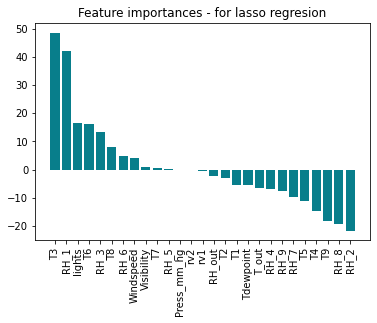

In [84]:
plt.bar(x=lassoImportantfeatures['feature'], height=lassoImportantfeatures['importance'], color='#087E8B')
plt.title('Feature importances - for lasso regresion')
plt.xticks(rotation='vertical')
plt.show()

**For lasso regression, we use features' coefficient as features importance coefficient, the model is fit after scaling so it is reasonable to compare this coefficient. The features that have larger coefficient could influenced the lasso regression more when it changes thus we think they are more important. From the plot above, in lasso regression T3,RH_1, RH_2, RH_8, T9 are features that are more important in these 27 features.**

### Decision Tree Feature Importance

In [88]:
dtFeatures = pd.DataFrame(dtModel_5.get_features())
dtFeatures.columns = ['featurename','treelevel']
dtFeatures = dtFeatures.drop_duplicates()
dtFeatures.sort_values('treelevel')

,featurename,treelevel
52,lights,0
24,RH_out,1
23,RH_1,2
10,T3,2
36,Windspeed,2
50,RH_6,2
4,RH_1,3
35,T3,3
22,T1,3
9,RH_2,3


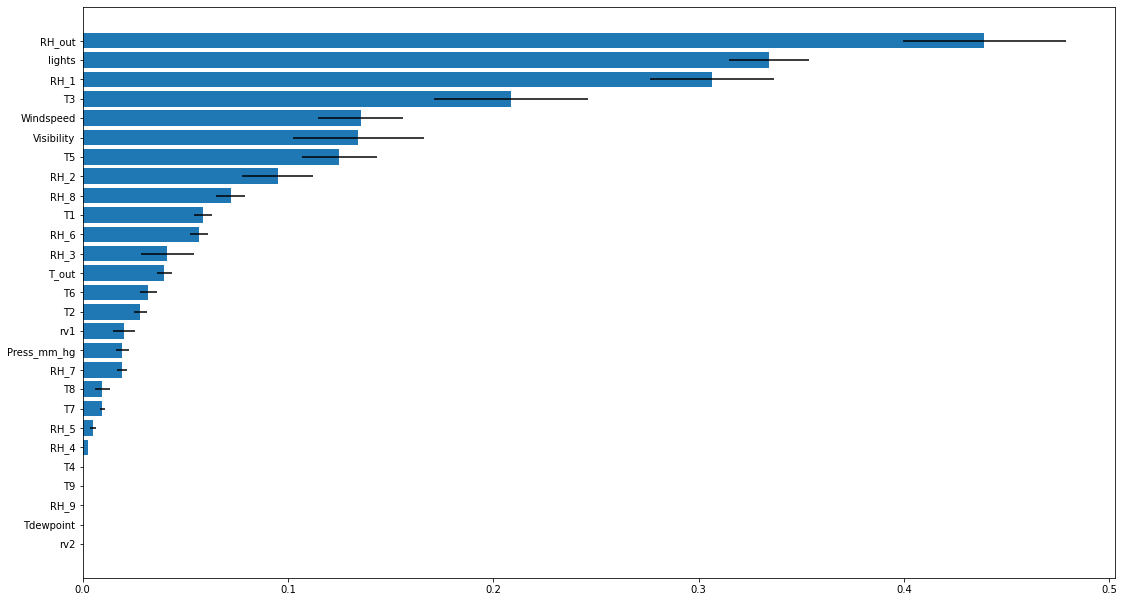

In [187]:
perm_importance_result_train = permutation_importance(dtModel_5, x_train, y_train, n_repeats=10)

fig=plot_feature_importances(perm_importance_result_train, x_train.columns)

**In decision Tree, the features that included in the tree plot are important features, the whole tree is determine by these feature as in the dataframe above, the features included in the table are lights,RH_out,RH_1,T3,Windspeed... and so on, sort by the tree level.**

**And also we could apply the function above to our decision tree model. It could rank our features by importance with permutation method. From the plot above, we could find that the most important features is RH_our, then lights, RH_1, T3, Windspeed, Visibility,T5,RH_2,RH_8,T1 (these are top 10 important features).**

### Random Forest Feature Importance

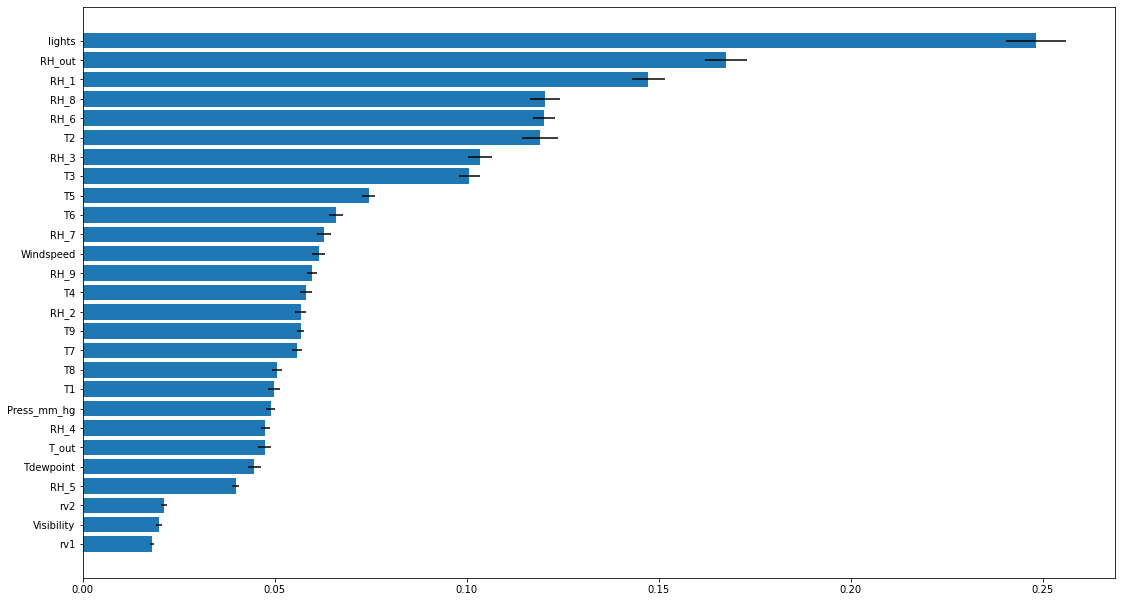

In [188]:
perm_importance_result_train = permutation_importance(rfr, x_train, y_train, n_repeats=10)

plot_feature_importances(perm_importance_result_train, x_train.columns)

**For Random Forest: from the plot above, we could find that the most important features is lights, then RH_out, RH_1,RH_8,RH_6,T2,RH_3,T3,T5,T6.(top 10 features). And the lights, the top one, has the score that much more higher than others.**

### Gradient Boosting

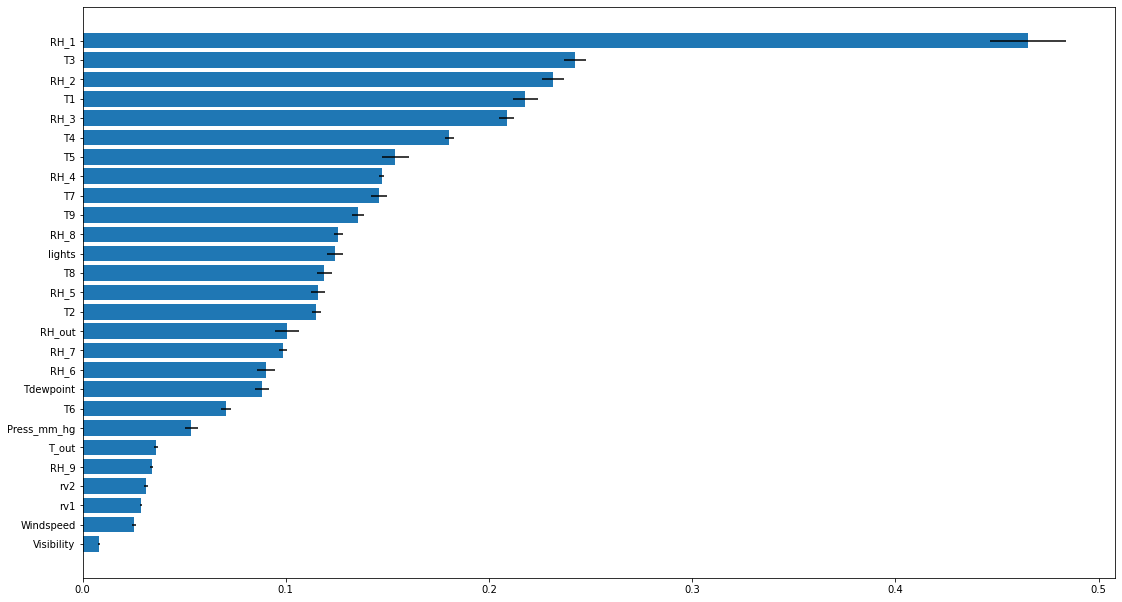

In [189]:
perm_importance_result_train = permutation_importance(gradBoostModel1, x_train, y_train, n_repeats=5)

plot_feature_importances(perm_importance_result_train, x_train.columns)

**For our gradient boosting model: from the plot above, we could find that the most important features is RH_1, then T3,RH_2,T1,RH_3,T4,T5,RH_4,T7,T9.(Top 10 features) And the RH_1 score is much more higher than others.**